# An introduction to Tensorflow

Tensorflow is a python framework, written by Google, for creating, training and testing neural networks. As with other frameworks, it provides tools for implementing dense layers, convolutional layers etc, as well as carrying out backgpropagation automatically. Tensorflow is quite low-level compared to tools such as Pytorch, so the definition of networks can be somewhat laborious, but on the other hand more precise.

A core idea in Tensorflow is having a clear separation between the **definition** and the **execution** of a neural network. The definition corresponds to creating the computational graph. In this step, only symbolic variables are created, and these are fed to functions whose derivatives are known. The computational graph is saved internally by Tensorflow. When the user wishes to execute the network (for training or testing), the user is required to open a ```Session()``` and feed actual numerical values to the Tensorflow variables. At this point it is possible to carry out training/testing. We will now see in more detail how this works.

### Importing Tensorflow

To import tensorflow, you add the following line at the beginning of the Python code :

- ```import tensorflow as tf```

All functions and variable types associated with Tensorflow are then called using the following syntax :

- ```tf.fun()``` (for a dummy function called fun)

### Variable types and functions

There are several functions and data types you need to understand in order to use Tensorflow. These are :

- ```tf.Placeholder(tf.float32, shape=(...))``` : This function creates a variable to which numerical values can be fed. This can be, for example, the input data to the neural network or the data labels in the case of a classification problem 
- ```tf.Variable()``` : This creates a variable in Tensorflow which contains some trainable parameters of the neural network. The argument to this function should be a numerical variable/array which you want to use to initialise the variable. For example : ```tf.Variable(np.ones((3,3))```
- ```tf.constant()``` : This creates a Tensorflow variable which remains constant. This could be, for example, a hyperparameter in the network. The argument to this function should be a numerical variable/array which you want to use to initialise the variable. For example : ```tf.constant(np.ones((3,3))```

### Creating and training a network

The definition of a network is just the application of several functions to the input placeholder, as well as a loss function applied to the last variable of the network, and a placeholder corresponding to the labels.

To train/test the network, the user must first call the following function :

- ```sess = tf.session()```

This starts the environment where data can be fed to the neural network.

At this point, the user can call the ```sess.run``` function to carry out either training or testing :

```sess.run(variable, feed_dict={X: numerical_data, Y: labels})```

```feed_dict``` corresponds to the data you wish to give to the network.  ```variable``` corresponds to the information which you wish the network to give (a prediction, for example). A special case is where variable contains an optimizer (defined using tensorflow functions) :

```sess.run(optimizer, feed_dict={X: numerical_data, Y: labels})```

In this case, Tensorflow will carry out training using the loss function in the optimizer variable, and update the network parameters accordingly.

Let's take a look at how this all works with some examples

In [13]:
import tensorflow as tf
import numpy as np

# create a Tensorflow constant, equal to 3
a = tf.constant(3)
# create a Tensorflow constant, equal to 2
b = tf.constant(2)
# define another variable 
c = a + b
print('a : ',a)
print('c : ',c)

a :  Tensor("Const_6:0", shape=(), dtype=int32)
c :  Tensor("add_2:0", shape=(), dtype=int32)


At this point, the variables a, b and c are purely symbolic (even though their values are fixed). To find its value, we need to create a session

In [14]:
# to open a session
sess = tf.Session()

Now, we can use that session to execute the operations previously defined, and find the value of c

In [15]:
sess.run(tf.global_variables_initializer())
print('c : ', sess.run(c))
# to close the session
sess.close()

c :  5


In general, an easier syntax is the following (automatically closes the session) :

In [16]:
with tf.Session() as sess:
    print('c : ', sess.run(c))
    

c :  5


Let's take a look at some placeholders now. We can give placeholders names for easier reference with the ```name``` argument.

In [17]:
x = tf.placeholder("float32", name="input")
y = x + tf.constant(3.0)

Now, we can find the value of y, given any input to the placeholder

In [18]:
with tf.Session() as sess:
    print('y : ',sess.run(y, feed_dict={x: 2}))
    print('y : ',sess.run(y, feed_dict={x: 3}))

y :  5.0
y :  6.0


We can also specify the size of the placeholder. Let's take the case of an image

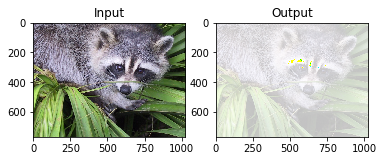

In [19]:
from scipy.misc import face
import matplotlib.pyplot as plt

img_in = face().astype(np.float32)/255.0

img_tf = tf.placeholder("float32", shape=[img_in.shape[0], img_in.shape[1], 3], name="input")
# change dynamic range of image
y = (img_tf-1)/4.0

with tf.Session() as sess:
    img_out = sess.run(y, feed_dict={img_tf: img_in})
    plt.subplot(1,2,1)
    plt.imshow(np.uint8(255.0*img_in))
    plt.title('Input')
    plt.subplot(1,2,2)
    plt.imshow(np.uint8(255.0*img_out))
    plt.title('Output')

## Automatic gradient calculation

Although backpropagation is carried out automatically during training, we can also explicitly carry out gradient calculations using Tensorflow. For this, we use the following syntax :

- ```grads = tf.gradients(x, y)```

This calculates the gradient of the Tensorflow variable ```x``` with respect to the Tensorflow variable ```y```. Let's look at an example

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


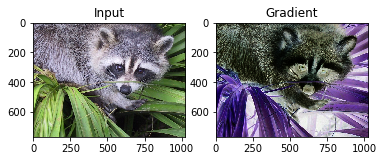

In [20]:

z = -(1./3.)*tf.pow(1-img_tf, 3.0)
grads = tf.gradients(tf.reduce_sum(z), img_tf)
with tf.Session() as sess:
    img_grad, = sess.run(grads, feed_dict={img_tf: img_in})

    plt.subplot(1,2,1)
    plt.imshow(np.uint8(255.0*img_in))
    plt.title('Input')
    plt.subplot(1,2,2)
    plt.imshow(np.uint8(255.0*img_grad))
    plt.title('Gradient')

Now carry out the gradient of $\sum_i -\frac{1}{3}(1-x_i)^3$ (where $x$ is the image) with respect to each pixel in $x$ by hand. Display the result. This should be exactly the same as the automatic gradient calculation

Text(0.5, 1.0, 'Gradient')

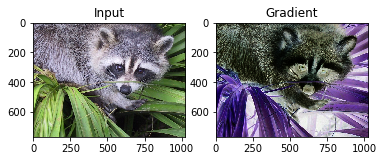

In [21]:
img_grad = (1 - img_in)**2

plt.subplot(1,2,1)
plt.imshow(np.uint8(255.0*img_in))
plt.title('Input')
plt.subplot(1,2,2)
plt.imshow(np.uint8(255.0*img_grad))
plt.title('Gradient')

## Training

To carry out training in the case of a standard classification problems, you need to define several things :

- input and output (label) variables
- training loss
- optimiser

You have to define the training loss, however there are Tensorflow functions which do this automatically. To create an optimiser, you must use Tensorflow functions. To create training variables for Tensorflow to minimise, you have to pass the loss to the optimiser as an argument, and ask it to minimise this loss. For example :

```my_loss = tf.square(X-Y)```

```my_optimiser = tf.train.GradientDescent()```

```training_variables = my_optimiser.minimize(loss)```

Once this is done, you can carry out a session.run on the ```training_variables``` to carry out backpropagation. A final note, to initialise certain internal variables in Tensorflow, you need to carry out the following operations before training :

```tf.global_variables_initializer().run()```

Let's look at this in more detail. First, let's define some dummy data for a binary labelling problem

In [22]:
# number of data samples
m = 1000
# number of features (dimensionality of data)
n = 10

X = np.random.randn(m,n)
Y = (np.random.rand(m,1) > 0.5).astype(float)

# train/test split
X_train = X[0:int(m/2),:]
Y_train = Y[0:int(m/2)]
X_test = X[int(m/2):,:]
Y_test = Y[int(m/2):]

Let's create a very simple neural network (one fully connected layer), define the loss and carry out training and testing

In [23]:
# you can use this to get reproducible results.
# Careful, you also need to specify the seed when you create your model parameters
RANDOM_SEED = 20
tf.set_random_seed(seed=RANDOM_SEED)
# tf.reset_default_graph()

# Placeholders for input and true output
X_input = tf.placeholder("float", shape=[None, n])
Y_true = tf.placeholder("float", shape=[None, 1])

# create a matrix of weights for a fully connected layer
w1 = tf.Variable(tf.random_normal([n,1], stddev=1.0, seed=RANDOM_SEED))
Y_pred = tf.nn.sigmoid(tf.matmul(X_input, w1))

# define some dummy loss
mse = tf.square( Y_true - Y_pred )
# average cross_entropy over the datapoints
loss = tf.reduce_mean(mse)
# create an optimiser 
optimiser = tf.train.AdamOptimizer(learning_rate=0.01)
# create the training variables for Tensorflow to optimise
training_variables = optimiser.minimize(loss)

with tf.Session() as sess:
    # Initialise variables for training
    tf.global_variables_initializer().run()
    # train one step
    sess.run(training_variables, feed_dict={X_input: X_train, Y_true: Y_train})
    # test
    y_out = sess.run(Y_pred, feed_dict={X_input: X_train})
    # accuracy (should be around 0.5)
    print('Accuracy : ', (1/(m/2.0))*( (y_out >0.5) == Y_test).sum() )
    

Accuracy :  0.512


This was a basic example of how to use Tensorflow for a classification problem. You can implement your own on much more complicated problems, with more sophisticated models. To find different functions, operations and variables specific to Tensorflow, see the documentation :

- Tensorflow (http://www.tensorflow.org)